## <h3 align="center"> **kNN -- Conexão entre Complexidade e Capacidade de Generalização**</h3> 




**Nome:** Gabriel Toshiyuki Batista Toyoda - 22153164

Vamos investigar se podemos observar a conexão entre complexidade
e generalização usando kNN. Nós faremos isso utilizando a
base de dados **Breast Cancer**. Nós começaremos dividindo a base de dados em um conjunto de treinamento e um conjunto de teste. Em seguida, nós avaliaremos
o desempenho no conjunto de treinamento e de teste com diferentes números de vizinhos.


In [106]:
# Importando bibliotecas necessárias
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import random

**Conhecendo a base Breast Cancer**

Neste exemplo, nós utilizaremos a base **Breast Cancer** disponível no sklearn, mas originário do repositório da UCI (https://archive.ics.uci.edu/ml/datasets/breast+cancer). Trata-se de uma base de dados que foi obtida a partir de imagens digitalizadas de massas mamárias e que descrevem **dois** tipos de classe: maligno (harmful) e benigno (not harmful). Os atributos descrevem características dos núcleos celulares presentes nas imagens.

No total, são **30 atributos** ordenados: raio médio, textura média, perímetro médio, área média, suavidade média, compacidade média, concavidade média, pontos côncavos médios, simetria média, dimensão fractal média, erro de raio, erro de textura, erro de perímetro, erro de área, erro de suavidade, erro de compactação, erro de concavidade, erro de pontos côncavos, erro de simetria, erro de dimensão fractal, pior raio, pior textura, pior perímetro, pior área, pior suavidade, pior compacidade, pior concavidade, piores pontos côncavos, pior simetria e pior dimensão fractal) e um alvo (tipo de câncer).



In [77]:
#Carregando a base de dados
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [78]:
#Verificando quantidade de instâncias e de atributos
# Vamos também acessar os dados

print(cancer.data.shape)
cancer.data

(569, 30)


array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [79]:
# E  as classes
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

Nós vamos dividir a base em **dois** conjuntos: **treino e teste**. A base de treino terá 75% das instâncias, enquanto a base de teste terá 25% do total de instâncias. As duas bases são estratificadas.

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

#Checando a divisão das instâncias entre as duas bases
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(426, 30) (426,)
(143, 30) (143,)


## **Variando o valor de kNN do classificador kNN**

Nós vamos primeiramente importar o método kNN do SKLearn

In [81]:
# Chamando os método kNN que será utilizado
from sklearn.neighbors import KNeighborsClassifier

**Tarefa 1:** Treine e teste o kNN variando o valor de k de 1 a 10.Depois compare as taxas de acurácia obtidas nas duas bases.

In [82]:
list_acc = []

for i in range(1, 11):
    print("\nPara n_neighbors =", i, ", temos:")
    treino = KNeighborsClassifier(n_neighbors = i)
    treino.fit(X_train, y_train)

    print(treino.score(X_test, y_test))
    list_acc.append(treino.score(X_test, y_test))


Para n_neighbors = 1 , temos:
0.9370629370629371

Para n_neighbors = 2 , temos:
0.9300699300699301

Para n_neighbors = 3 , temos:
0.9300699300699301

Para n_neighbors = 4 , temos:
0.916083916083916

Para n_neighbors = 5 , temos:
0.9300699300699301

Para n_neighbors = 6 , temos:
0.9230769230769231

Para n_neighbors = 7 , temos:
0.9440559440559441

Para n_neighbors = 8 , temos:
0.9440559440559441

Para n_neighbors = 9 , temos:
0.9440559440559441

Para n_neighbors = 10 , temos:
0.9440559440559441


0.9440559440559441


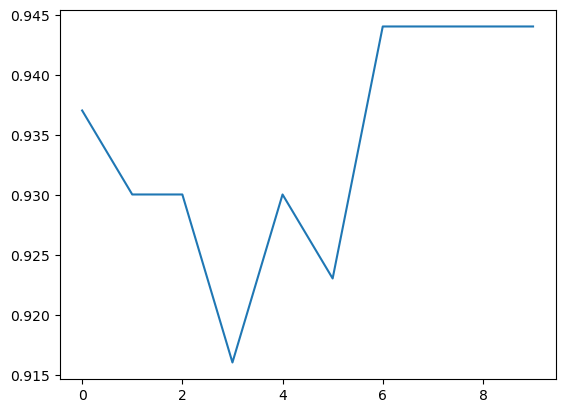

In [83]:
plt.plot(list_acc)
print(max(list_acc))

Comparando o desempenho do modelo ao variar o valor de k nos dois conjuntos de dados.

**Tarefa 2:** Responda as seguintes perguntas.


1.   Qual o melhor valor de k e por quê?
2.   O que pode ser observado ao variarmos o valor de k nas questões de overfitting e underfitting?

Resposta 1: O melhor valor para k é 7, 8, 9 ou 10, já que estes possuem a maior acurácia como mostrado no gráfico acima.

Resposta 2: O overfitting ocorre quando o modelo se ajusta demais aos dados de treinamento, resultando em um desempenho ruim quando confrontado com novos dados. O overfitting é caracteristico de escolhas de K muito baixos.

O underfitting, por sua vez, resulta em modelos muito generalistas que não conseguem capturar as relações entre os dados. Este resultado é caracteristico de valores muito altos de K.

## <h3 align="center"> **Comparando kNN, Árvore de Decisão e Naive Bayes**</h3> 

## **Qual é o melhor método: kNN, Árvore ou Naive Bayes?**

Agora nós vamos comparar o desempenho de **kNN**, **Árvore de Decisão** e de **Naive Bayes** (GaussianNB)  fazendo **ajuste dos hiperparâmetros dos métodos**: *n_neighbors* para kNN e *max_depth* para árvore.

É importante lembrar que, como haverá **ajuste de hiparâmetros**, a base de teste somente poderá ser usada ao final, após os hiperparâmetros serem todos ajustados. Portanto, para o ajuste de hiperparâmetros, nós utilizaremos a **base de validação**. Além disso, para facilitar a observação de ocorrência de **overfitting**, nós sempre compararemos a acurária no treino e na validação.


Como nós faremos ajustes dos hiperparâmetros dos métodos, nós vamos dividir a base em **três** partições: **treino, validação e teste**. A base de treino terá 60% das instâncias, enquanto as bases de teste e de validação terão 20% cada.

In [84]:
#Vamos, inicialmente, dividir a base em duas partições: treino e teste. A base de treino terá 80% das instâncias, enquanto a de teste terá 20%

from sklearn.model_selection import train_test_split

#Dividindo a base (com seleção de instâncias aleatória)
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state = 42)

#Checando a divisão das instâncias entre as duas bases
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(455, 30) (455,)
(114, 30) (114,)


Agora vamos dividir **a base de treino em duas bases: treino e validação**. Ao final, a base de treino terá 60% das instâncias originais, enquanto a base de validação terá 20%, assim como a base de teste já criada.

In [85]:
#Dividindo a base de treino (com seleção de instâncias aleatória)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)

#Checando a divisão das instâncias entre as duas bases
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(341, 30) (341,)
(114, 30) (114,)


Vamos iniciar com o método de **Árvore de Decisão**. 

Na próxima célula nós temos: a criação do modelo de árvore, o treinamento do modelo, a predição do modelo na base de validação, e o cálculo e exibição da acurácia do modelo de Árvore de Decisão na base de treinamento e na base de validação.

Você deve fazer **cinco** execuções variando o valor de max_depth nos seguintes valores de 1 a 5.

O valor que produzir melhor acurácia na validação deverá ser escolhido para avaliar a base de teste. Caso haja empate, escolha um dos valores empatados de forma aleatória.

In [86]:
from sklearn import tree

list_val = []
list_test = []

for i in range(1, 6):
    print("\nPara profundidade =", i, ", temos:")
    treino = tree.DecisionTreeClassifier(max_depth = i)
    treino.fit(X_train, y_train)

    print("Teste:", treino.score(X_test, y_test))
    list_test.append(treino.score(X_test, y_test))
    
    print("Validação:", treino.score(X_val, y_val))
    list_val.append(treino.score(X_val, y_val))


Para profundidade = 1 , temos:
Teste: 0.9122807017543859
Validação: 0.9122807017543859

Para profundidade = 2 , temos:
Teste: 0.956140350877193
Validação: 0.9122807017543859

Para profundidade = 3 , temos:
Teste: 0.956140350877193
Validação: 0.9210526315789473

Para profundidade = 4 , temos:
Teste: 0.9473684210526315
Validação: 0.9122807017543859

Para profundidade = 5 , temos:
Teste: 0.956140350877193
Validação: 0.9210526315789473


In [87]:
print("Máxima acurácia de validação na árvore:", max(list_val))

Máxima acurácia de validação na árvore: 0.9210526315789473


Vamos fazer o mesmo processo com o método de **kNN**. 

Você deve fazer execuções variando o valor de *n_neighbors* nos seguintes valores: de 1 a 9.
O valor que produzir melhor acurácia na validação deverá ser escolhido para avaliar a base de teste. Caso haja empate, escolha um dos valores empatados de forma aleatória.

In [88]:
list_valknn = []
list_testknn = []

for i in range(1, 10):
    print("\nPara k =", i, ", temos:")
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    print("Teste:", knn.score(X_test, y_test))
    list_testknn.append(knn.score(X_test, y_test))
    
    print("Validação:", knn.score(X_val, y_val))
    list_valknn.append(knn.score(X_val, y_val))


Para k = 1 , temos:
Teste: 0.9385964912280702
Validação: 0.9298245614035088

Para k = 2 , temos:
Teste: 0.9298245614035088
Validação: 0.9122807017543859

Para k = 3 , temos:
Teste: 0.9473684210526315
Validação: 0.9385964912280702

Para k = 4 , temos:
Teste: 0.956140350877193
Validação: 0.9210526315789473

Para k = 5 , temos:
Teste: 0.9649122807017544
Validação: 0.9298245614035088

Para k = 6 , temos:
Teste: 0.956140350877193
Validação: 0.9385964912280702

Para k = 7 , temos:
Teste: 0.9736842105263158
Validação: 0.9385964912280702

Para k = 8 , temos:
Teste: 0.9649122807017544
Validação: 0.9385964912280702

Para k = 9 , temos:
Teste: 0.9824561403508771
Validação: 0.9298245614035088


In [89]:
print("Máxima acurácia de validação em kNN:", max(list_valknn))

Máxima acurácia de validação em kNN: 0.9385964912280702


Por fim, vamos fazer o mesmo processo com o método de **Naive Bayes**, sem ajuste de hiperparâmetros. 


In [90]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

print("Teste:", nb.score(X_test, y_test))

nb_val = nb.score(X_val, y_val)
print("Validação:", nb.score(X_val, y_val))

Teste: 0.9649122807017544
Validação: 0.9210526315789473


**Tarefa 3:** Qual dos algoritmos de Aprendizagem de Máquina apresentou melhor resultado? Apesente os resultados de comparação.

In [91]:
print("Máxima acurácia de validação na árvore:", max(list_val))
print("Máxima acurácia de validação em kNN:", max(list_valknn))
print("Acurácia de Naive Bayes:", nb_val)

Máxima acurácia de validação na árvore: 0.9210526315789473
Máxima acurácia de validação em kNN: 0.9385964912280702
Acurácia de Naive Bayes: 0.9210526315789473


In [112]:
ocorrencia = []

for i in range(len(list_valknn)):
    if(list_valknn[i] == max(list_valknn)):
        ocorrencia.append(i + 1)
        
print(ocorrencia)

random.choice(ocorrencia)

[3, 6, 7, 8]


7

Resposta 3: Como mostrado acima, a máxima acurácia na base de validação dentre os três modelos é 0.9385964912280702, que é o valor de k = 7.